# Estimating distributions (part 2)
The goal of this notebook is to explore a first approach to approximate $p(y|x)$ and $p(x|y)$ on a tabular dataset where $x$ is real-valued, $x\in\mathbb{R}^k$, and the target $y$ is discrete and finite, $y\in\{0,\ldots,d\}⊆\mathbb{N}, d\geq 1$.

## Imports

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load data set

In [2]:
iris = datasets.load_iris()

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
X = iris.data
y = iris.target

In [6]:
sepal_length = X[:, 0]
sepal_length

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

## Approximate $p(y|x)$
Take $x$ to be sepal length and estimate the conditional probability of the target variable $y$ given $x$. Then, sample 10 values of $y$ given a $x=4.75$.

Realizamos un histograma de sepal length, diferenciando por clase. 

In [7]:
setosa_sepal_length = sepal_length[y == 0]
versicolor_sepal_length = sepal_length[y == 1]
virginica_sepal_length = sepal_length[y == 2]

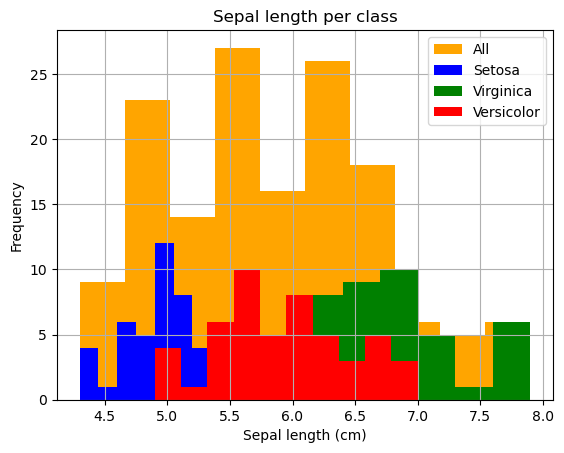

In [8]:
plt.hist(sepal_length, bins=10, color="orange", label="All")
plt.hist(setosa_sepal_length, bins=10, color="blue", label="Setosa")
plt.hist(virginica_sepal_length, bins=10, color="green", label="Virginica")
plt.hist(versicolor_sepal_length, bins=10, color="red", label="Versicolor")
plt.xlabel("Sepal length (cm)")
plt.ylabel("Frequency")
plt.title("Sepal length per class")
plt.legend()
plt.grid(True)
plt.show()

Definimos los bins y discretizamos sepal length:

[ 3  2  2  1  2  3  1  2  1  2  3  2  2  1  4  4  3  3  4  3  3  3  1  3
  2  2  2  3  3  2  2  3  3  4  2  2  4  2  1  3  2  1  1  2  3  2  3  1
  3  2  7  6  7  4  6  4  5  2  6  3  2  5  5  5  4  7  4  4  5  4  5  5
  5  5  6  6  7  7  5  4  4  4  4  5  3  5  7  5  4  4  4  5  4  2  4  4
  4  5  3  4  5  4  7  5  6  9  2  8  7  8  6  6  7  4  4  6  6  9  9  5
  7  4  9  5  7  8  5  5  6  8  8 10  6  5  5  9  5  6  5  7  7  7  4  7
  7  7  5  6  5  5]


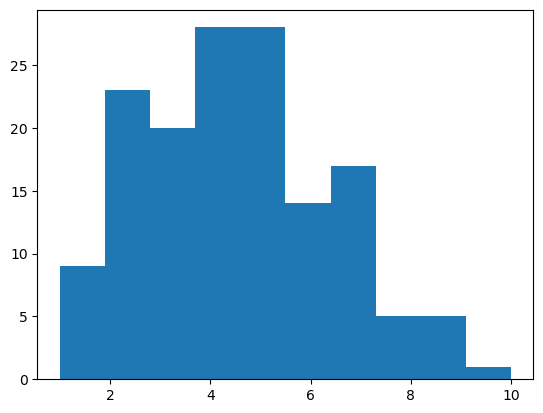

In [9]:
bins = np.linspace(sepal_length.min(), sepal_length.max(), 10)

sepal_length = np.digitize(sepal_length, bins)

print(sepal_length)

plt.hist(sepal_length)
plt.show()

In [10]:
xvalues = np.unique(sepal_length).tolist()
yvalues = np.unique(y).tolist()

print(xvalues, yvalues)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] [0, 1, 2]


In [11]:
categories = list(map(lambda x: iris.target_names[x], yvalues))
categories

['setosa', 'versicolor', 'virginica']

In [12]:
N = len(sepal_length)
obs = pd.DataFrame(0, columns=categories, index=xvalues)
for i in range(N):
    xi = sepal_length[i]
    yi = categories[y[i]]
    obs[yi][xi] += 1
obs

,setosa,versicolor,virginica
1,9,0,0
2,19,3,1
3,17,3,0
4,5,18,5
5,0,15,13
6,0,5,9
7,0,6,11
8,0,0,5
9,0,0,5
10,0,0,1


In [13]:
m = obs.sum(axis=1)
m

1      9
2     23
3     20
4     28
5     28
6     14
7     17
8      5
9      5
10     1
dtype: int64

In [14]:
l = obs.sum(axis=0)
l

setosa        50
versicolor    50
virginica     50
dtype: int64

In [15]:
obs["m"] = m
obs.loc["l"] = l
obs

,setosa,versicolor,virginica,m
1,9.0,0.0,0.0,9.0
2,19.0,3.0,1.0,23.0
3,17.0,3.0,0.0,20.0
4,5.0,18.0,5.0,28.0
5,0.0,15.0,13.0,28.0
6,0.0,5.0,9.0,14.0
7,0.0,6.0,11.0,17.0
8,0.0,0.0,5.0,5.0
9,0.0,0.0,5.0,5.0
10,0.0,0.0,1.0,1.0


In [16]:
p_y_x = pd.DataFrame(0, columns=categories, index=xvalues)
for x in xvalues:
    p_y_x.loc[x] = obs[categories].loc[x] / obs["m"].loc[x]
p_y_x

,setosa,versicolor,virginica
1,1.000000,0.000000,0.000000
2,0.826087,0.130435,0.043478
3,0.850000,0.150000,0.000000
4,0.178571,0.642857,0.178571
5,0.000000,0.535714,0.464286
6,0.000000,0.357143,0.642857
7,0.000000,0.352941,0.647059
8,0.000000,0.000000,1.000000
9,0.000000,0.000000,1.000000
10,0.000000,0.000000,1.000000


In [17]:
pred_bin = np.digitize(4.75, bins)
pred_bin

2

In [18]:
predictions = np.random.choice(categories, size=10, p=p_y_x.loc[pred_bin]).tolist()
predictions

['setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'virginica',
 'setosa',
 'setosa',
 'setosa']

### Otra forma utilizando un modelo de tipo mezcla de gaussianas
$p(x) = ∑_y p(y) * N(μ_y,σ_y)$ manteniendo $X =$ sepal length

In [19]:
setosa_sepal_length = sepal_length[y == 0]
versicolor_sepal_length = sepal_length[y == 1]
virginica_sepal_length = sepal_length[y == 2]

In [20]:
setosa_mean = np.mean(setosa_sepal_length)
versicolor_mean = np.mean(versicolor_sepal_length)
virginica_mean = np.mean(virginica_sepal_length)

setosa_std_dev = np.std(setosa_sepal_length)
versicolor_std_dev = np.std(versicolor_sepal_length)
virginica_std_dev = np.std(virginica_sepal_length)

means = np.array([setosa_mean, versicolor_mean, virginica_mean])
stds = np.array([setosa_std_dev, versicolor_std_dev, virginica_std_dev])
p_y = np.ones(3) / 3
classes = np.unique(y)

Sampleo una clase $y$ y a partir de la media y la desviación estandar genero una muestra con distribución normal para la $X$ de esa clase 

In [21]:
c = np.random.choice(classes, p=p_y)
c

2

In [22]:
sampled_x = np.random.normal(means[c], stds[c], 100)
sampled_x

array([ 6.00602058,  7.42277309,  6.82942123,  6.91376023,  5.52808476,
        7.93443217,  7.81373613,  5.23761293,  5.94028708,  5.42254102,
        6.54731417,  4.44859469,  5.70589501,  5.39698101,  6.49340198,
        4.23603912, 10.02217903,  5.06856516,  6.85134263,  6.25252248,
        5.46555708,  5.85232522,  6.83920027,  4.28575651,  3.80809562,
        5.72973952,  9.81163656,  6.43725762,  8.86251824,  2.81239885,
        7.16000572,  3.50858755,  7.62655067,  7.22772439,  6.31926474,
        7.26306193,  9.70565251,  7.88714881,  4.20647304,  6.5700256 ,
        4.31947026,  6.89595016,  6.85338755,  7.55925179,  4.68947378,
        6.26061982,  3.36055759,  4.98132531,  7.39273136,  4.92918668,
        7.30555132,  4.94386887,  7.53731224,  3.54508025,  5.31692854,
        5.38448779,  5.85255325,  7.28314425,  8.09489638,  8.44360425,
        5.67119822,  7.38512043,  4.65689727,  6.78157961,  7.6808147 ,
        5.63515514,  4.34602483,  5.06628338,  4.9783639 ,  4.27

(array([ 3.,  4., 11., 19., 13., 17., 20.,  6.,  3.,  4.]),
 array([ 2.81239885,  3.53337687,  4.25435489,  4.9753329 ,  5.69631092,
         6.41728894,  7.13826696,  7.85924497,  8.58022299,  9.30120101,
        10.02217903]),
 <BarContainer object of 10 artists>)

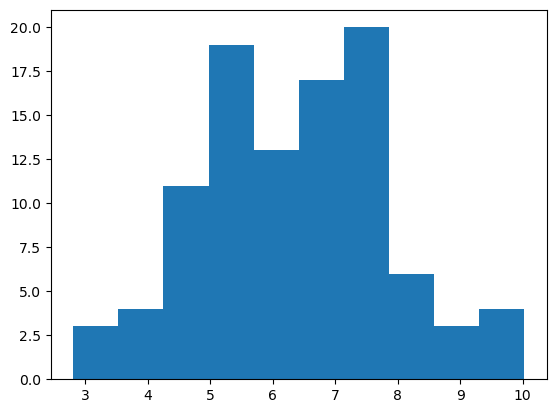

In [23]:
plt.hist(sampled_x)

## Approximate $p(x|y)$
Take $y$ to be setosa and estimate the probability of sepal length given setosa (or, equivalently, the *likelihood* of setosa given sepal length). Then, generate 10 samples of sepal length and label them appropriately.

### Histogramas
Realizamos histogramas separando por $y$ para observar la distribución de cada clase.

#### Setosa

(array([ 9.,  0.,  0., 19.,  0.,  0., 17.,  0.,  0.,  5.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

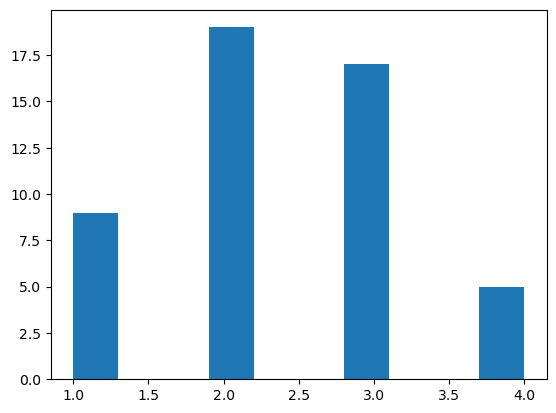

In [24]:
plt.hist(setosa_sepal_length, bins=10)

In [25]:
setosa_bin_frequencies, _ = np.histogram(setosa_sepal_length)
print("Bins frequencies: ", setosa_bin_frequencies.tolist())

print("Mean: ", setosa_mean)

print("Standard deviation: ", setosa_std_dev)

setosa_sample = np.random.normal(setosa_mean, setosa_std_dev, 1000)

Bins frequencies:  [9, 0, 0, 19, 0, 0, 17, 0, 0, 5]
Mean:  2.36
Standard deviation:  0.8890444308357147


(array([ 1.,  0.,  0.,  0.,  0.,  3.,  0.,  1.,  2.,  3.,  3.,  3.,  4.,
        11.,  9., 17., 13., 28., 31., 34., 36., 35., 43., 44., 51., 55.,
        46., 56., 54., 55., 44., 35., 43., 37., 33., 26., 29., 30., 20.,
        17., 16.,  7.,  9.,  4.,  3.,  4.,  1.,  2.,  1.,  1.]),
 array([-0.92835046, -0.80880694, -0.68926342, -0.5697199 , -0.45017638,
        -0.33063286, -0.21108933, -0.09154581,  0.02799771,  0.14754123,
         0.26708475,  0.38662827,  0.50617179,  0.62571531,  0.74525883,
         0.86480235,  0.98434587,  1.10388939,  1.22343292,  1.34297644,
         1.46251996,  1.58206348,  1.701607  ,  1.82115052,  1.94069404,
         2.06023756,  2.17978108,  2.2993246 ,  2.41886812,  2.53841164,
         2.65795517,  2.77749869,  2.89704221,  3.01658573,  3.13612925,
         3.25567277,  3.37521629,  3.49475981,  3.61430333,  3.73384685,
         3.85339037,  3.97293389,  4.09247742,  4.21202094,  4.33156446,
         4.45110798,  4.5706515 ,  4.69019502,  4.80973854,

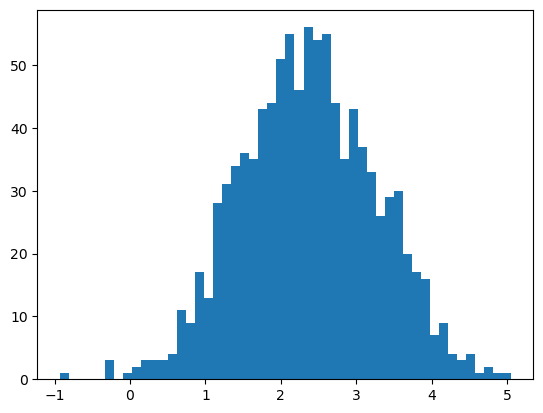

In [26]:
plt.hist(setosa_sample, bins=50)

#### Versicolor

(array([ 3.,  0.,  3.,  0., 18.,  0., 15.,  0.,  5.,  6.]),
 array([2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ]),
 <BarContainer object of 10 artists>)

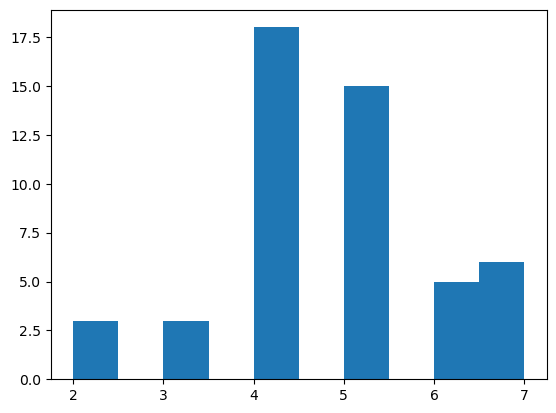

In [27]:
plt.hist(versicolor_sepal_length)

In [28]:
versicolor_bin_frequencies, _ = np.histogram(versicolor_sepal_length)
print("Bins frequencies: ", versicolor_bin_frequencies.tolist())

print("Mean: ", versicolor_mean)

print("Standard deviation: ", versicolor_std_dev)

versicolor_sample = np.random.normal(versicolor_mean, versicolor_std_dev, 1000)

Bins frequencies:  [3, 0, 3, 0, 18, 0, 15, 0, 5, 6]
Mean:  4.68
Standard deviation:  1.2718490476467716


(array([ 2.,  4.,  3.,  4.,  6.,  7.,  6.,  9.,  9., 21., 12., 17., 23.,
        27., 21., 33., 39., 26., 41., 31., 46., 37., 44., 49., 53., 39.,
        48., 48., 43., 33., 27., 21., 28., 23., 30., 16., 18., 12.,  9.,
         5.,  6.,  9.,  4.,  1.,  3.,  3.,  2.,  1.,  0.,  1.]),
 array([1.33356892, 1.47638605, 1.61920319, 1.76202033, 1.90483746,
        2.0476546 , 2.19047173, 2.33328887, 2.47610601, 2.61892314,
        2.76174028, 2.90455741, 3.04737455, 3.19019169, 3.33300882,
        3.47582596, 3.61864309, 3.76146023, 3.90427737, 4.0470945 ,
        4.18991164, 4.33272877, 4.47554591, 4.61836305, 4.76118018,
        4.90399732, 5.04681445, 5.18963159, 5.33244873, 5.47526586,
        5.618083  , 5.76090013, 5.90371727, 6.04653441, 6.18935154,
        6.33216868, 6.47498581, 6.61780295, 6.76062009, 6.90343722,
        7.04625436, 7.18907149, 7.33188863, 7.47470577, 7.6175229 ,
        7.76034004, 7.90315717, 8.04597431, 8.18879145, 8.33160858,
        8.47442572]),
 <BarContainer

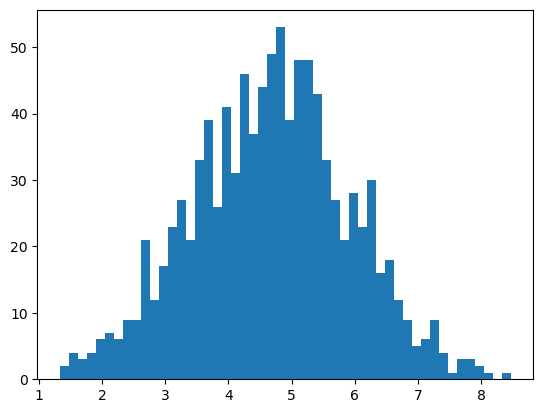

In [29]:
plt.hist(versicolor_sample, bins=50)

#### Virginica

(array([ 1.,  0.,  5., 13.,  0.,  9., 11.,  5.,  5.,  1.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

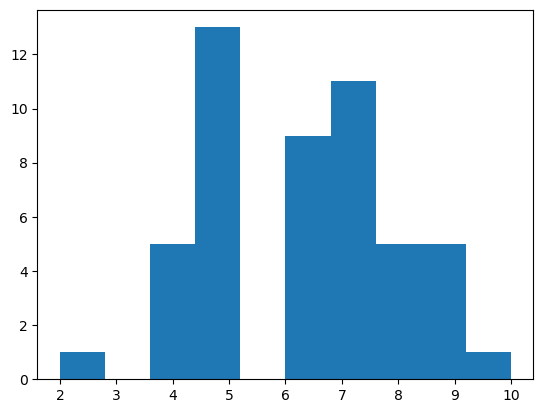

In [30]:
plt.hist(virginica_sepal_length)

In [31]:
virginica_bin_frequencies, _ = np.histogram(virginica_sepal_length)
print("Bins frequencies: ", virginica_bin_frequencies.tolist())

print("Mean: ", virginica_mean)

print("Standard deviation: ", virginica_std_dev)

virginica_sample = np.random.normal(virginica_mean, virginica_std_dev, 1000)

Bins frequencies:  [1, 0, 5, 13, 0, 9, 11, 5, 5, 1]
Mean:  6.26
Standard deviation:  1.659035864591239


(array([ 2.,  3.,  3.,  2.,  6.,  8., 10.,  8., 11., 14., 17., 17., 22.,
        22., 23., 30., 41., 36., 53., 41., 47., 47., 45., 39., 43., 39.,
        45., 53., 37., 40., 32., 24., 21., 16., 16., 19.,  7., 13.,  8.,
         6., 11.,  2.,  4.,  6.,  7.,  1.,  2.,  0.,  0.,  1.]),
 array([ 1.87618762,  2.06736112,  2.25853463,  2.44970813,  2.64088163,
         2.83205513,  3.02322864,  3.21440214,  3.40557564,  3.59674915,
         3.78792265,  3.97909615,  4.17026965,  4.36144316,  4.55261666,
         4.74379016,  4.93496367,  5.12613717,  5.31731067,  5.50848417,
         5.69965768,  5.89083118,  6.08200468,  6.27317819,  6.46435169,
         6.65552519,  6.84669869,  7.0378722 ,  7.2290457 ,  7.4202192 ,
         7.61139271,  7.80256621,  7.99373971,  8.18491321,  8.37608672,
         8.56726022,  8.75843372,  8.94960722,  9.14078073,  9.33195423,
         9.52312773,  9.71430124,  9.90547474, 10.09664824, 10.28782174,
        10.47899525, 10.67016875, 10.86134225, 11.05251576,

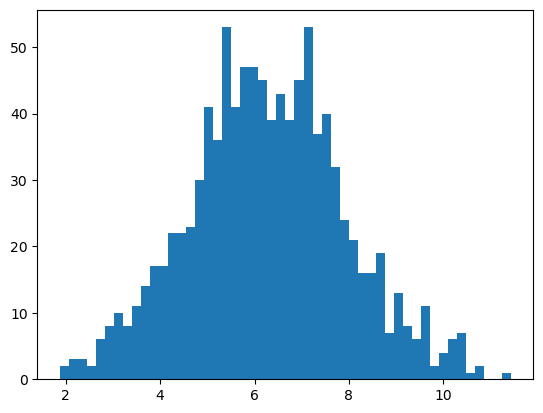

In [32]:
plt.hist(virginica_sample, bins=50)

Comprobamos que hay 3 distribuciones normales pero distintas: 

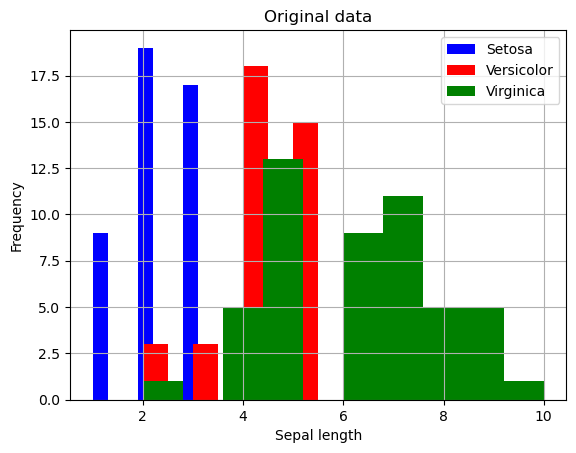

In [33]:
plt.hist(setosa_sepal_length, bins=10, color="blue", label="Setosa")
plt.hist(versicolor_sepal_length, bins=10, color="red", label="Versicolor")
plt.hist(virginica_sepal_length, bins=10, color="green", label="Virginica")
plt.xlabel("Sepal length")
plt.ylabel("Frequency")
plt.title("Original data")
plt.legend()
plt.grid(True)
plt.show()

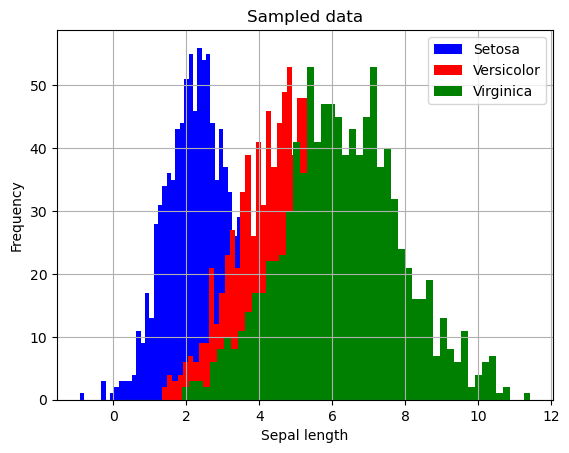

In [34]:
plt.hist(setosa_sample, bins=50, color="blue", label="Setosa")
plt.hist(versicolor_sample, bins=50, color="red", label="Versicolor")
plt.hist(virginica_sample, bins=50, color="green", label="Virginica")
plt.xlabel("Sepal length")
plt.ylabel("Frequency")
plt.title("Sampled data")
plt.legend()
plt.grid(True)
plt.show()

Definimos p(x|y) a partir de los histogramas

In [35]:
p_x_y = pd.DataFrame(0, columns=categories, index=[])
p_x_y["setosa"] = setosa_bin_frequencies / np.sum(setosa_bin_frequencies)
p_x_y["versicolor"] = versicolor_bin_frequencies / np.sum(versicolor_bin_frequencies)
p_x_y["virginica"] = virginica_bin_frequencies / np.sum(virginica_bin_frequencies)
p_x_y

,setosa,versicolor,virginica
0,0.18,0.06,0.02
1,0.00,0.00,0.00
2,0.00,0.06,0.10
3,0.38,0.00,0.26
4,0.00,0.36,0.00
5,0.00,0.00,0.18
6,0.34,0.30,0.22
7,0.00,0.00,0.10
8,0.00,0.10,0.10
9,0.10,0.12,0.02


Se samplea un bin de acuerdo a p(x|y) y dentro del bin obtenido se samplea un x con distribución uniforme

In [36]:
sampled_bins = np.random.choice(xvalues, size=10, p=p_x_y["setosa"])
sampled_values = np.random.uniform(low=np.where(sampled_bins - 2 == -1, bins[0], bins[sampled_bins - 2]), high=np.where(sampled_bins - 2 == -1, bins[1], bins[sampled_bins - 1]))
sampled_values

array([6.52239819, 5.14096443, 4.45706569, 6.41355894, 7.77994062,
       5.4646327 , 4.41743359, 4.49193348, 7.80965049, 6.68215019])